In [1]:
import socket
import numpy as np
from io import BytesIO
import PIL.Image
from IPython.display import clear_output,Image, display, HTML #clean this line
import time

In [2]:
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 1)*255)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [3]:
def connect_socket():
    HOST = '127.0.0.1'
    PORT = 7777
    
    sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_address = (HOST, PORT)
    try:
        sock.connect(server_address)
        print("connected ")
        
    except:
        print("can't connect")
    return sock

In [4]:
sock_ = connect_socket()
print(sock_)

can't connect
<socket.socket fd=57, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 57101)>


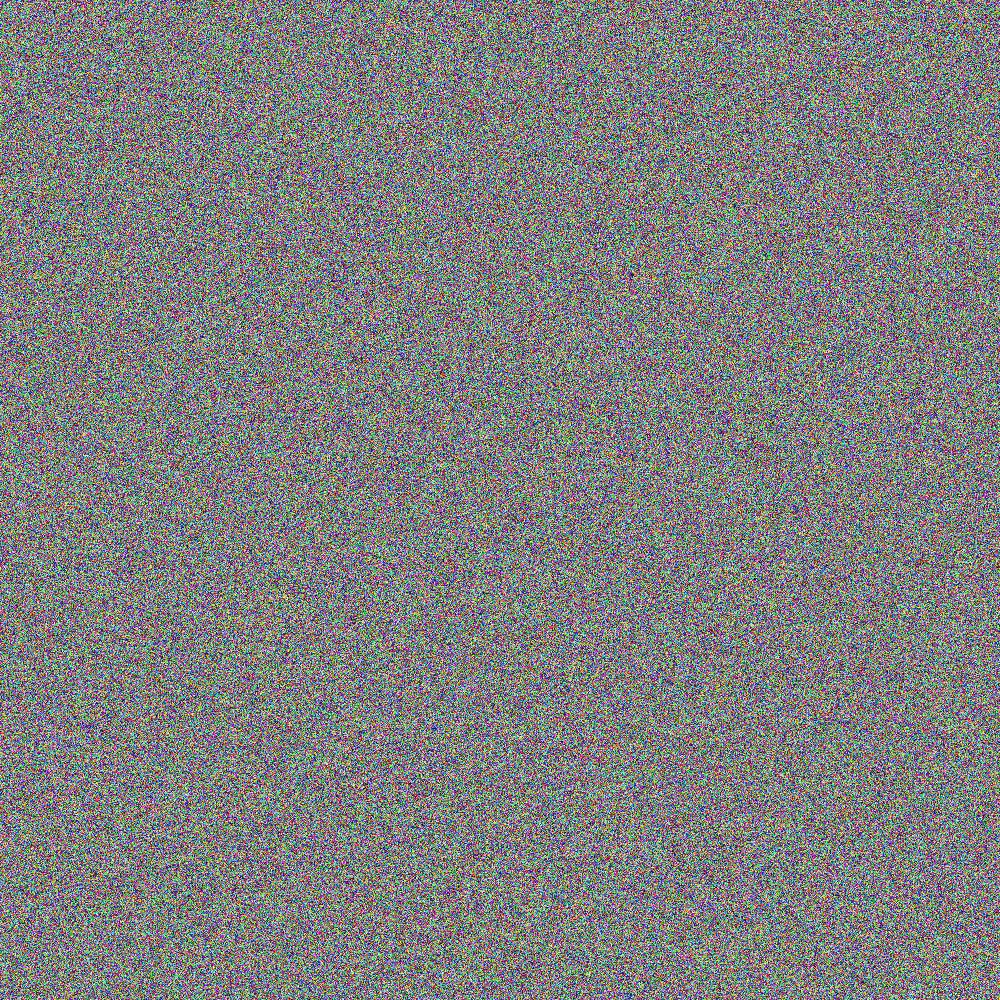

In [5]:
img_noise = np.random.uniform(size=(1000,1000,3))*255.0

imgN = img_noise
imgN = np.float32(imgN)
#img0 = np.float32(img0)
showarray(imgN/255.0)

In [6]:
def send_image(sock_, img_):


    
    sock_.setblocking(1)
    
    imgByteArr = BytesIO()
    img_.save(imgByteArr, format='JPEG')
    imgByteArr = imgByteArr.getvalue()

    size = len(imgByteArr)

    print(("SIZE" + str(size)).encode('utf-8'))
    
    sock_.sendall(("SIZE" + str(size)).encode('utf-8'))
    size_answer = sock_.recv(4096)
    
    size_answer = (size_answer[2:].decode('utf-8'))
    print(size_answer)
    
    if size_answer == 'SIZERCVD':
        
        not_yet = True
        while not_yet:
            print("about to send")
            sock_.setblocking(1)
            sock_.sendall(imgByteArr)
            
            time.sleep(1)
            
            img_answer =""
            try:
                sock_.setblocking(0)
                img_answer = sock_.recv(4096)
                print(img_answer)
                img_answer = (img_answer[2:].decode('utf-8'))
                if img_answer == "IMGRCVD":
                    not_yet = False
            except:
                print("not yet")
            
        print("img sent succesfully!")
        
        sock_.sendall(("READY".encode('utf-8')))
        
        #recibe procesado.
        begin=time.time()
            
            

        #total data partwise in an array
        total_data=[];


        data = ''.encode()
        data_count = 0
                
        sock_.setblocking(0)

        timeout = 5
        while 1:
            #if you got some data, then break after timeout
            if total_data and time.time()-begin > timeout:
                break

            #if you got no data at all, wait a little longer, twice the timeout
            elif time.time()-begin > timeout*2:
                break

            #recv something
            try:
                data = sock_.recv(4096)
                if data:
                    total_data.append(data)
                    #total_data.extend(data)
                    #change the beginning time for measurement
                    begin=time.time()
                    data_count += 1
                    #print("new data: " + str(data_count) + "  len: "+str(len(data)))
                else:
                    #sleep for sometime to indicate a gap
                    time.sleep(0.1)
            except:
                pass

        print("total data count:")
        print(len(total_data))

        joindata = ''.encode()
        for dd in total_data:
            joindata += dd

        bb = BytesIO(joindata)
        image = np.array(PIL.Image.open(bb)) 


        img_s = PIL.Image.fromarray(image, 'RGB')


        return img_s
        
        
    
    return img_

In [7]:
sock = connect_socket()
n_times = 4
for i in range(n_times):
    
    
    img01 = np.uint8(np.clip(imgN/255.0,0,1)*255)
    img01 = PIL.Image.fromarray(img01)
    
    print("time: "+ str(i))
    img_r = send_image(sock, img01)
    img_r.show()
    
    time.sleep(3)

connected 
time: 0
b'SIZE602776'
SIZERCVD
about to send
not yet
about to send
b'\x00\x07IMGRCVD'
img sent succesfully!
total data count:
137
time: 1
b'SIZE602776'
SIZERCVD
about to send
not yet
about to send
b'\x00\x07IMGRCVD'
img sent succesfully!
total data count:
64
time: 2
b'SIZE602776'
SIZERCVD
about to send
not yet
about to send
b'\x00\x07IMGRCVD'
img sent succesfully!
total data count:
64
time: 3
b'SIZE602776'
SIZERCVD
about to send
not yet
about to send
b'\x00\x07IMGRCVD'
img sent succesfully!
total data count:
64
